In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [7]:
# Generate sample data
X, y = make_moons(n_samples=1800, noise=0.16, random_state=42)

In [9]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Create and train the model
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [14]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [16]:
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("f*Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

f*Accuracy: {accuracy:.4f}

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       197
           1       0.98      0.99      0.98       163

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [20]:
def plot_decision_boundary(x, y, model, ax=None):
    ax = ax or plt.gca()

    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    return ax

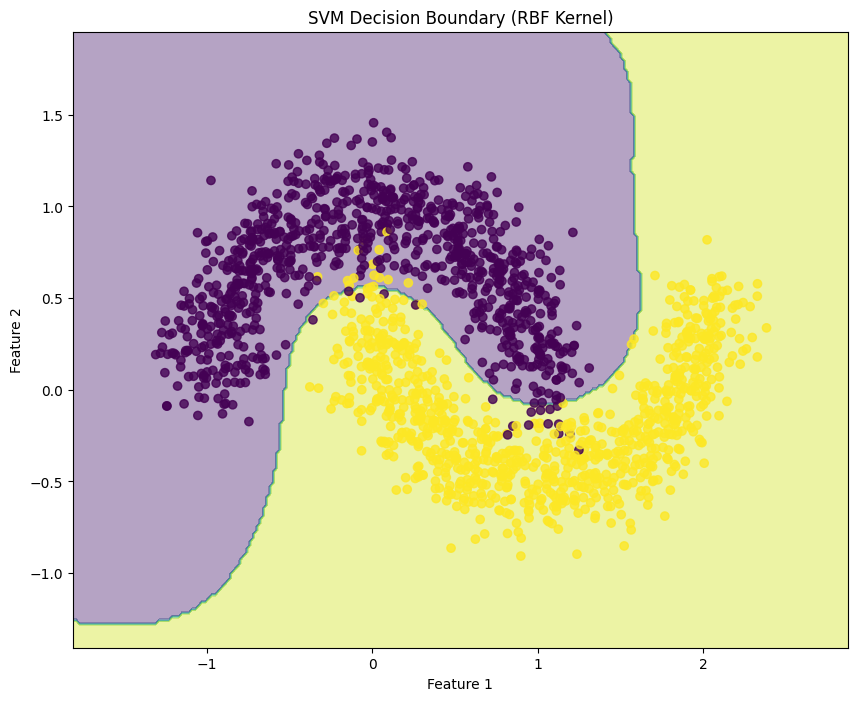

In [22]:
plt.figure(figsize=(10, 8))
plot_decision_boundary(X, y, model)
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.show()